<a href="https://colab.research.google.com/github/sudip234-source/Heart-Disease-Prediction/blob/main/Project_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Data Sets files/heart.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.shape

(1025, 14)

# **Data Exploration**

(<Axes: xlabel='target'>,
 target
 1    0.513171
 0    0.486829
 Name: proportion, dtype: float64,
 target
 1    526
 0    499
 Name: count, dtype: int64)

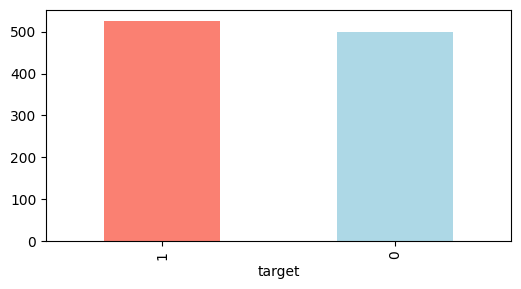

In [ ]:
plt.figure(figsize=(6,3))
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue']),df.target.value_counts(normalize=True),df.target.value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts()

,count
sex,
1,713
0,312


In [ ]:
pd.crosstab(index=df.target,columns=df.sex)

sex,0,1
target,,
0,86,413
1,226,300


here wee see that a woman has approx 72% chance having heart disease
whereas for men it is ~42% chance

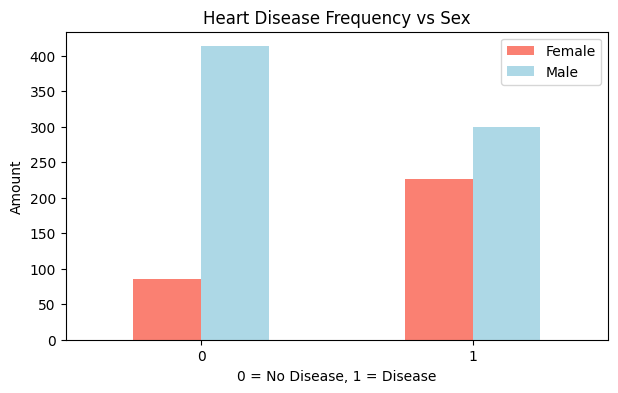

In [ ]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(7,4), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

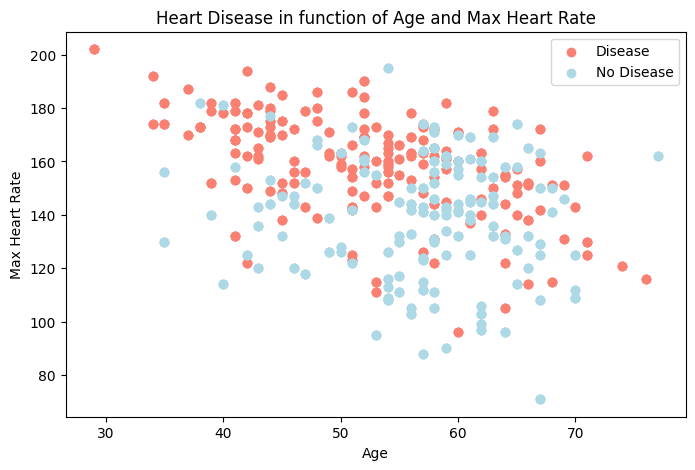

In [ ]:
plt.figure(figsize=(8,5))

# Start with positve examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and it seems there may be more heart disease in the younger population too (more orange dots).

<Figure size 800x500 with 0 Axes>

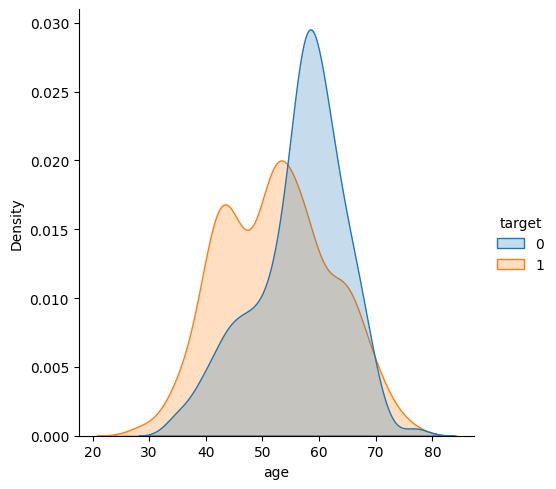

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x="age", hue="target", kind="kde", fill=True)

We are seeing that this normally distributed slightly skwed to the right

In [ ]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


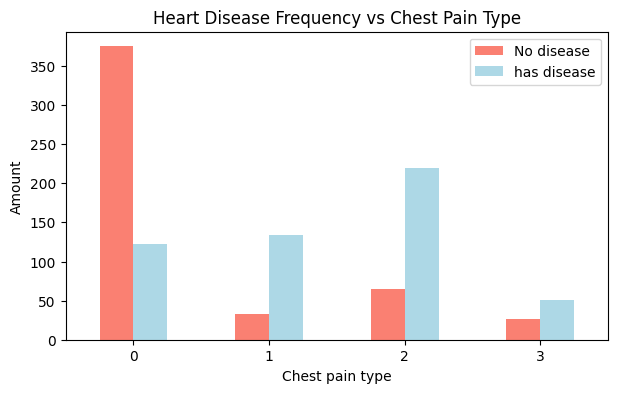

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(7,4),color=['salmon','lightblue'])
plt.title('Heart Disease Frequency vs Chest Pain Type')
plt.xlabel('Chest pain type')
# 0: Typical angina (chest pain),
# 1: Atypical angina (chest pain not related to heart),
# 2: Non-anginal pain (typically esophageal spasms (non heart related),
#  3: Asymptomatic (chest pain not showing signs of disease)
plt.ylabel('Amount')
plt.legend(['No disease','has disease'])
plt.xticks(rotation=0);

It's interesting that atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Corerelation Matrix

<Axes: >

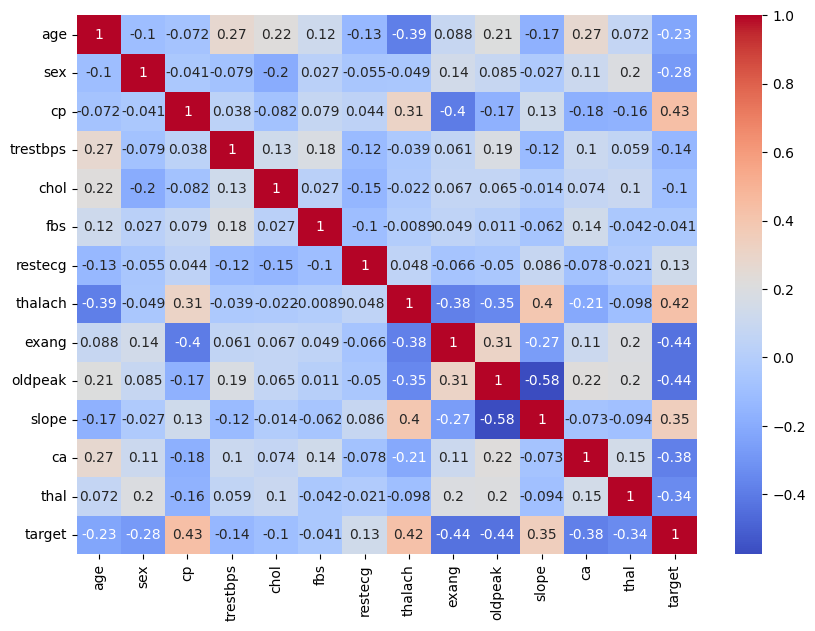

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

# **Modelling**

In [ ]:
x = df.drop('target',axis=1)
y = df['target']

In [ ]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

# **Prediction**

In [ ]:
models = {'KNN':KNeighborsClassifier(),
          'Logistic Regression':LogisticRegression(),
          'Random Forest':RandomForestClassifier()}

In [ ]:
models.items()

dict_items([('KNN', KNeighborsClassifier()), ('Logistic Regression', LogisticRegression()), ('Random Forest', RandomForestClassifier())])

In [ ]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
  np.random.seed(42)
  model_scores = {}
  for name,model in models.items():
    model.fit(x_train,y_train)
    model_scores[name] = model.score(x_test,y_test)
  return model_scores

In [ ]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7317073170731707,
 'Logistic Regression': 0.7853658536585366,
 'Random Forest': 0.9853658536585366}

(array([0, 1, 2]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'Random Forest')])

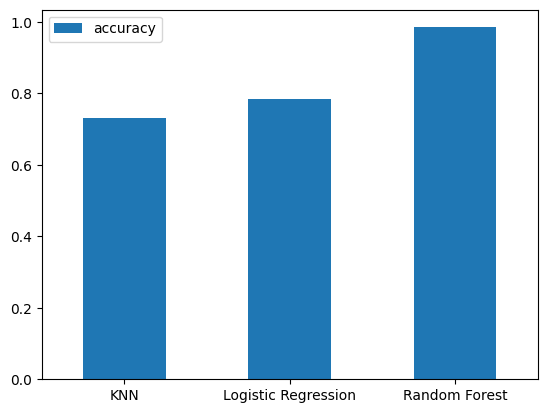

In [ ]:
model_score = pd.DataFrame(model_scores,index=['accuracy'])
model_score.T.plot.bar()
plt.xticks(rotation=0)

## **Hyperparameter Tuning and ROC-AUC Evaluation **

Here's the plan:

Tune model hyperparameters, and see which performs best
Perform cross-validation

Plot ROC curves

Make a confusion matrix

Get precision, recall and F1-score metrics

Find the most important model features

### Tune *KNearestNeighbours*

In [ ]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value

    # Fit the algorithm
    knn.fit(x_train, y_train)

    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))

    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))
#

In [ ]:
pd.DataFrame({'train_score':train_scores,'test_score':test_scores})

,train_score,test_score
0,1.000000,0.985366
1,0.996341,0.956098
2,0.991463,0.902439
3,0.947561,0.809756
4,0.923171,0.731707
5,0.820732,0.687805
6,0.791463,0.678049
7,0.792683,0.668293
8,0.767073,0.717073
9,0.785366,0.717073


Maximum KNN score on the test data: 98.54%


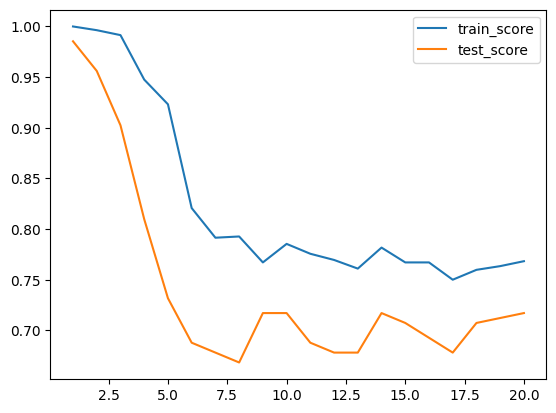

In [ ]:
plt.plot(range(1,21),train_scores,label='train_score')
plt.plot(range(1,21),test_scores,label='test_score')
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

looking at the graph it seems that k-neighbour = 1 is best

**Tuning models with with RandomizedSearchCV**

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "newton-cg",'saga']}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
%%time
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

CPU times: user 2.06 s, sys: 1.95 ms, total: 2.06 s
Wall time: 2.2 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg',
                                                   'saga']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [ ]:
rs_log_reg.score(x_test,y_test)

0.7951219512195122

In [ ]:
%%time
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1min 46s, sys: 287 ms, total: 1min 46s
Wall time: 2min 6s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
rs_rf.score(x_test,y_test)
#

0.926829268292683

In [ ]:
%%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1.37 s, sys: 1.66 ms, total: 1.38 s
Wall time: 4.62 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(x_test,y_test)
#

0.7853658536585366

**Evaluating a classification model, beyond accuracy**

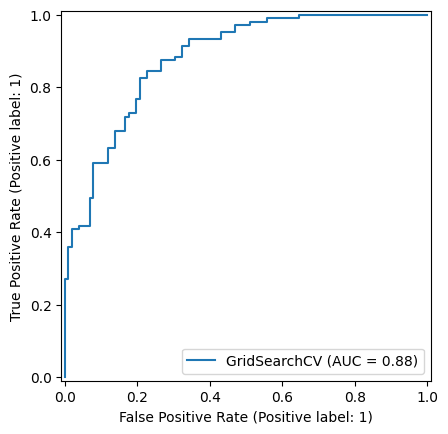

In [ ]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=x_test,
                               y=y_test);

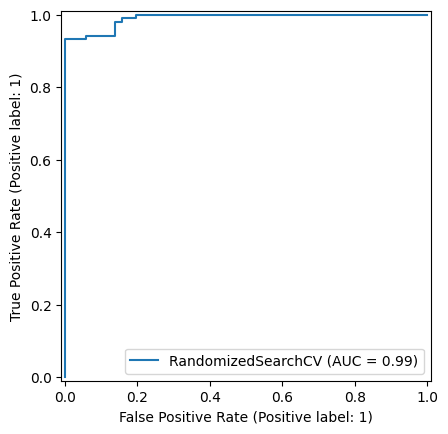

In [ ]:
RocCurveDisplay.from_estimator(estimator=rs_rf,
                               X=x_test,
                               y=y_test);

In [ ]:
y_log_pred = gs_log_reg.predict(x_test)
y_rf_pred = rs_rf.predict(x_test)

In [ ]:
confusion_matrix(y_log_pred,y_test)

array([[71, 13],
       [31, 90]])

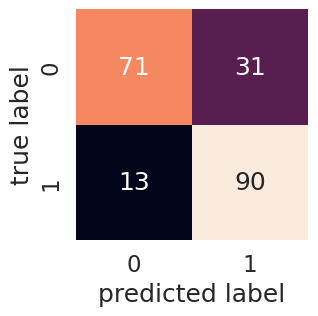

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_preds,y_test),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("predicted label")
    plt.ylabel("true label")

plot_conf_mat(y_log_pred,y_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report = pd.DataFrame(classification_report(y_test,y_log_pred,output_dict=True))
classification_report

,0,1,accuracy,macro avg,weighted avg
precision,0.845238,0.743802,0.785366,0.794520,0.794272
recall,0.696078,0.873786,0.785366,0.784932,0.785366
f1-score,0.763441,0.803571,0.785366,0.783506,0.783604
support,102.000000,103.000000,0.785366,205.000000,205.000000


In [ ]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C=1.623776739188721, solver='liblinear')
from sklearn.model_selection import cross_val_score
cv_acc=np.mean(cross_val_score(clf,x,y,cv=5,scoring='accuracy'))

In [ ]:
cv_precision=np.mean(cross_val_score(clf,x,y,cv=5,scoring='precision'))
cv_recall=np.mean(cross_val_score(clf,x,y,cv=5,scoring='recall'))
cv_f1=np.mean(cross_val_score(clf,x,y,cv=5,scoring='f1'))
cv_acc,cv_precision,cv_recall,cv_f1

(0.8478048780487806,
 0.8226314773669621,
 0.8974303683737646,
 0.8583430306540801)

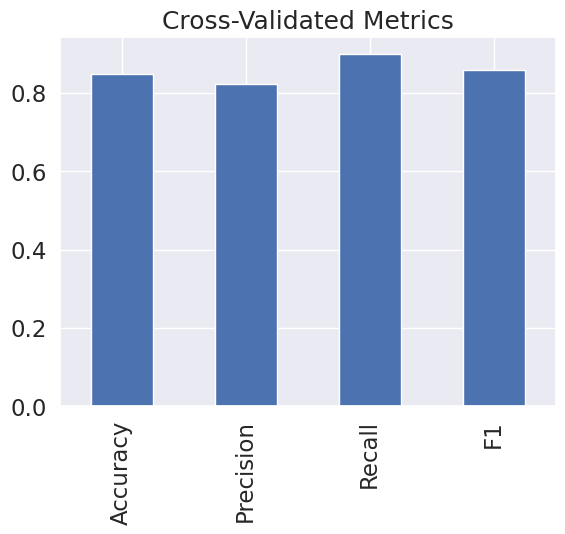

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [ ]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

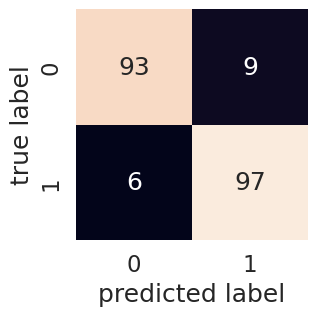

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_preds,y_test),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("predicted label")
    plt.ylabel("true label")

plot_conf_mat(y_rf_pred,y_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=510, min_samples_leaf=14, min_samples_split=2, max_depth=None)
from sklearn.model_selection import cross_val_score
cv_acc=np.mean(cross_val_score(rf,x,y,cv=5,scoring='accuracy'))
cv_precision=np.mean(cross_val_score(rf,x,y,cv=5,scoring='precision'))
cv_recall=np.mean(cross_val_score(rf,x,y,cv=5,scoring='recall'))
cv_f1=np.mean(cross_val_score(rf,x,y,cv=5,scoring='f1'))
cv_acc,cv_precision,cv_recall,cv_f1

(0.8848780487804879,
 0.8716789998340069,
 0.9297933513027852,
 0.8901984399721338)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'accuracy'),
  Text(1, 0, 'precision'),
  Text(2, 0, 'recall'),
  Text(3, 0, 'f1-score')])

<Figure size 1200x800 with 0 Axes>

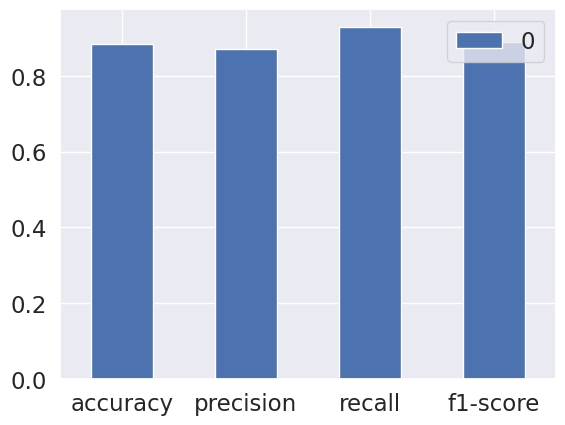

In [ ]:
plt.figure(figsize=(12,8))
conclusio_rf = pd.DataFrame({'accuracy':cv_acc,'precision':cv_precision,'recall':cv_recall,'f1-score':cv_f1},index=[0])
conclusio_rf.T.plot.bar()
plt.xticks(rotation=0)

In [ ]:
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.01245689, -1.68544402,  0.85198764, -0.01578096, -0.00828761,
        -0.20903191,  0.32008044,  0.03461353, -0.79648686, -0.65056533,
         0.56750662, -0.81568847, -1.04166391]])

In [ ]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.012456889767138938,
 'sex': -1.685444021247855,
 'cp': 0.8519876366750196,
 'trestbps': -0.015780957498061826,
 'chol': -0.008287611569400352,
 'fbs': -0.2090319083260421,
 'restecg': 0.32008043783454215,
 'thalach': 0.03461353169715527,
 'exang': -0.796486864291127,
 'oldpeak': -0.6505653264898916,
 'slope': 0.5675066198882789,
 'ca': -0.8156884690315791,
 'thal': -1.0416639061893234}

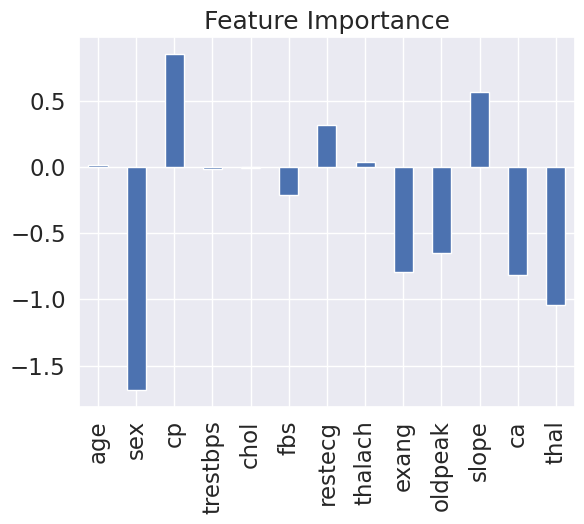

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,86,226
1,413,300


 it seems if the patient is female, they're more likely to have heart disease

In [ ]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


Looking back the data dictionary, we see slope is the "slope of the peak exercise ST segment" where:

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart